<center><h1> IFT-6758 : Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Homework - 1 : Solutions</h3></center> 



In [ ]:
#@title Imports (Run this cell first) { run: "auto" }
plotting_library = "matplotlib"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# Uncomment this line below if using seaborn
#sns.set() 

%matplotlib inline

path = 'https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/{}'

## Data Wrangling

#### Q1

**7 points** = $(2 + 2 + 1 + 2)              $

Given below is the code to load a dataset with the population of different geographical regions in Canada. 

In [ ]:
pop_df = pd.read_csv(path.format('canada-population.csv'))

(a) Visualize the distribution of the `population` column using an appropriate histogram. Does the distribution resemble any well-known distribution? What aspect of the data causes this shape of the distribution?

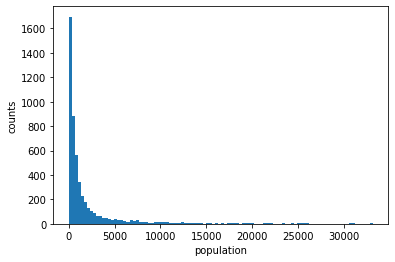

In [ ]:
plt.hist(pop_df.population.dropna(),bins=100,range=(0,pop_df.population.dropna().quantile(q=0.975)))
plt.xlabel('population')
plt.ylabel('counts');

Exponential distribution -  as seen from the histogram.

Alternate : Log-normal distribution

(Other variants from the Exponential family of distributions are acceptable, if provided with good explanation)


(b) A common strategy is to transform the data to bring it closer to a better distribution. Try out the following transformations and *visually* determine if any of them lead it closer to another well-known distribution. **Name the distribution(s) if it is different from (a)**:

> 1.   $\sqrt{population}$

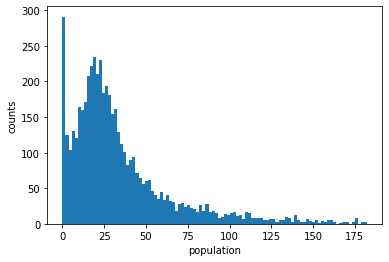

In [ ]:
sqrt_population = np.sqrt(pop_df.population.dropna())
plt.hist(sqrt_population,bins=100,range=(0,sqrt_population.quantile(q=0.975)))
plt.xlabel('population')
plt.ylabel('counts');

Poisson Distribution

Alternate : Log-normal distribution

(Other variants from the Exponential family of distributions are acceptable, if provided with good explanation)

> 2.   $log_{10}(1+population)$


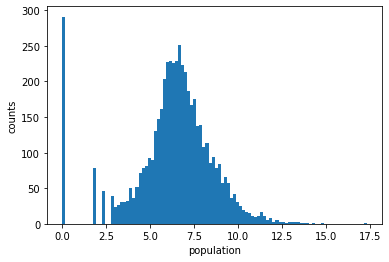

In [ ]:
plt.hist(np.log(1+pop_df.population.dropna()), bins=100)
plt.xlabel('population')
plt.ylabel('counts');

#Alternatively, use np.log1p(pop_df.population.dropna()) as it equivant to the np.log(1+...) above


Normal distribution - due to the very clear bell-shaped curve.

(Poisson (with a higer $\lambda$) is also acceptable)

(c) What difference do you think the above `log` transfomation makes with `1 + population` as opposed to using just `population`?

We notice from the above plots that there are too many 0s in the samples. As `log(0)` gives `-np.inf` ($-\infty$), it is not a useful way of transforming the data to model a distribution. Thus adding 1 before taking the `log` has a negligible effect on the other values while fixing the infinity issue with 0.

You can try running the cell below and notice the last row.

In [ ]:
np.log(pop_df.population)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       17.326360
1        4.127134
2        5.075174
3        6.345636
4        4.394449
          ...    
5249     1.609438
5250     7.382746
5251     7.153834
5252     6.801283
5253         -inf
Name: population, Length: 5254, dtype: float64

(d) Try out the same log transfomation in (c) with different values of the base of the log. What difference do you observe when you change the base?

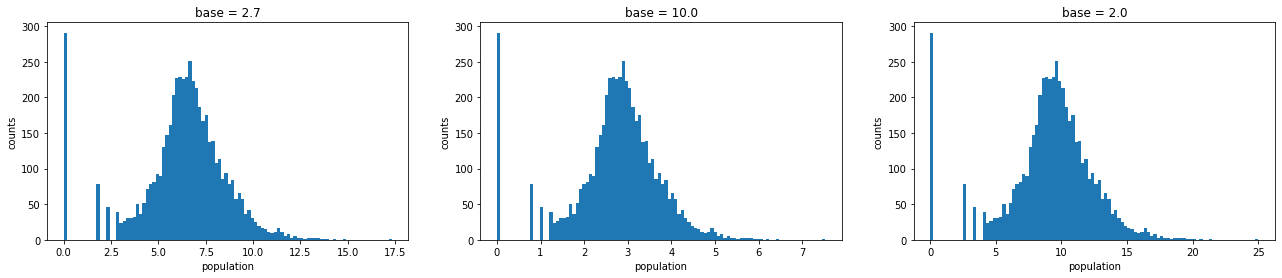

In [ ]:
#Let us try 3 different bases

bases = [np.e, 10, 2]

fig, ax = plt.subplots(1,3, figsize=(22,4))
ax[0].hist(np.log(1+pop_df.population.dropna()), bins=100);
ax[1].hist(np.log10(1+pop_df.population.dropna()), bins=100);
ax[2].hist(np.log2(1+pop_df.population.dropna()), bins=100);

for b,axis in zip(bases,ax):
  axis.set_title('base = {:.1f}'.format(b))
  axis.set_xlabel('population')
  axis.set_ylabel('counts');

The shape of the data distribution remains the same, but only the "scale" of the values changes. This means that it does not really matter which base you use in such a transformation. However, if your model has constraints on the range of data, you can pick the base that suits the particular range.  

## Exploratory Analysis

####Q2

**9 points** = $(1 + 1.5 + 3 + 2 + 1.5)$

The next cell loads the fancy penguins dataset into a dataframe.

In [ ]:
penguins = pd.read_csv(path.format('fancy-penguins.csv'))

(a) Remove the rows that have `NaN` values *for all* numerical features except `body_color`. 

(b) In the result obtained in (a), how many penguins have no `body_color` assigned? Replace these `body_color` entries with a string type `unknown` 


(c) Visualize this data in a pair plot and guess the possible `body_color` of the penguins that have no `body_color` assigned.**Justify** your choice.


(d) Load the dataset afresh again. Replace the `NaN` values present in the the features with their respective *in-class means* for all numerical fields where each *class* is the unique combination of the `species` and `island`. Example: The  `bill_depth_mm` of an `Adelie	Torgersen` penguins replaced with the mean of `bill_depth_mm` of all the other `Adelie	Torgersen` entries, and so on for all fields. 

(e) Plot the pair plot of this transformed dataset. Make any comment(s) on what you observe here compared to (c).

## Data Visualization

####Q3

**13 points** = $(3*1 + 3*2 + 3 + 1)              $




In this problem, the task is to visualize the data about the number of taxi pickups in a city at different time scales. The dataset contains details of taxi pickups during several months. 

Observe the datatype of the field indicating the trip start timestamp. A lot of information can be extracted from just that string.

In [ ]:
trips = pd.read_csv(path.format('city-taxi.csv'))

(a) Extract the following from the trip start timestamp and add new columns to store them in the dataframe : 
* day of the month (1-31)
* day of the week (Monday-Sunday)
* hour of the day


`to_datatime()` function in Pandas is the easiest way to use. 

There are other ways to parse the timestamp string and extract the same information, which are equally correct. 

In [ ]:
trips['day_of_month'] = pd.to_datetime(trips.trip_start_timestamp).dt.day
trips['day_of_week'] = pd.to_datetime(trips.trip_start_timestamp).dt.weekday
trips['hour_of_day'] = pd.to_datetime(trips.trip_start_timestamp).dt.hour

You can check a subset of the extracted values :

In [ ]:
trips[['trip_start_timestamp','day_of_month','day_of_week', 'hour_of_day']].tail(5)

,trip_start_timestamp,day_of_month,day_of_week,hour_of_day
19995,2013-04-07 22:45:00+00:00,7,6,22
19996,2013-04-09 15:30:00+00:00,9,1,15
19997,2013-04-07 23:00:00+00:00,7,6,23
19998,2013-04-16 04:45:00+00:00,16,1,4
19999,2013-04-05 14:00:00+00:00,5,4,14


(b) Produce suitable plots through code to observe the following relationships and give a single line comment about the taxi usage pattern of the city residents in the mentioned context. 

1. The number of rides by day of the month.

2. The number of rides by the day of the week. 

3. The number of hourly rides during the day.

(c) On a single plot, depict the taxi usage during different times of the day for cash and credit card rides. Add a suitable legend and label the axes.  

(d) Overall it was noted that there were substantially more credit card rides than cash rides. Is this true throughout the day?

## K-Nearest Neighbors

####Q4

**8 points** = $(1.5 + 2.5 + 2 + 2)$                

Consider the sample dataset given in the following table which represents samples from the selection for a certain tax-benefit scheme based on credit score (on 800) and annual income of individuals :

**Train set :**

Sample|Score (800)|Income($)|Result|
--|--|--|--|
T1|400|20000|Selected|
T2|200|2000|Rejected|
T3|600|10000|Selected|
T4|100|4000|Rejected|
T5|800|2000|Rejected|
T6|500|10000|Selected|


**Test set :**

Sample|Score (800)|Income($)|Result|
--|--|--|--|
A|200|12000|?|
B|600|2000|?|

(Note: The `Sample` column in the table is merely a unique name for each data sample to reference in the questions and your answers)

Consider a kNN model with k=1 and L1 distance as the metric : $$L_1[(x_1, y_2) || (x_2, y_2)] = |x_1 - x_2| + |y_1 - y_2|$$

(a) For the two test samples `A` and `B`, determine the `Result` based on your manual fitting of the above model on the train set.

* Sample A : 

Smallest distance is $L_1(A,T6) = 2300$ 

$\implies Result(A) = Result(T6) = $ **Selected**

* Sample B : 

Smallest distance is $L_1(B,T5) = 200$ 

$\implies Result(B) = Result(T5) = $ **Rejected**


(b) In the raw data :
*  Convert the `Score` column as a percentage of the maximum possible credit score
*  Subtract the `Income` by the minimum income in the train set and divide this result by again using the minimum income. 

Recalibrate your kNN model and determine the `Result` of the model for the predictions of the test samples `A` and `B`.    

[link text](https://)After doing the data transformation :

**Train set :**

Sample|Score (800)|Income($)|Result|
--|--|--|--|
T1|50|9|Selected|
T2|25|0|Rejected|
T3|75|4|Selected|
T4|12.5|2|Rejected|
T5|12.5|0|Rejected|
T6|62.5|4|Selected|


**Test set :**

Sample|Score (800)|Income($)|Result|
--|--|--|--|
A|25|5|?|
B|75|0|?|

* Sample A : 

Smallest distance is $L_1(A,T2) = 5$ 

$\implies Result(A) = Result(T2) = $ **Rejected**

* Sample B : 

Smallest distance is $L_1(B,T3) = 4$ 

$\implies Result(B) = Result(T3) = $ **Selected**

(c) Do you see a potential issue with fitting raw data like this to the kNN model? What is a reasonable solution?


We see that the closest neighbors for the same sample (A or B) in each of the cases (a) and (b) are different and consequently the results are just opposites. 

The influence of each feature on the distance is dependent on the scale of the feature. Thus, depending on the scale of a feature, the model can have different results giving different accuracies. It is very important to deal with this as kNN model is very sensitive to the value of the distance metric.

The best solution would be to normalize the features to the same acceptable range (like 0-1 or 0-100) by scaling or transformation (like `log`) so that their scales do not differently impact the $L_1$ distance and to enforce equal 'influence' on the distance.

(d) You discover many more attributes (features) about the individuals that you can include in your dataset and fit a model. Is kNN still a good choice in this case? **Why/Why not?**

With more number of features, the dimensionality of the feature space (datapoints) increases. Especially with kNN as it is based (very sensitive to) on a distance metric, the proximity of datapoints is affected in higher dimensions due to the curse of dimensionality. So, kNN is **not a good choice** in the case. 

## Decision Trees

#### **Q5**

**5 points** = $(2.5 + 2.5)$

Consider the figure below :

  (a) Sketch the tree corresponding to the partition of the predictor space
illustrated in the left-hand panel. The numbers inside the boxes indicate the
mean of $Y$ within each region.                                                       

  (b) Create a diagram similar to the left-hand panel, using the tree illustrated in the right-hand panel. You should divide up the predictor space into the correct regions, and indicate the mean for each region.

<img width=600 src="https://i.ibb.co/PD3N5Zt/Trees.png" alt="Trees" border="0" /> 



(a)

<img width=400 src="https://i.ibb.co/jZVLZzg/partition-to-tree.png" alt="partition-to-tree"/>

(b)



<img src="https://i.ibb.co/vHsBc4S/tree-to-partition.png"/>

#### **Q6**

**13 points** = $(1 + 1 + 2 + 1.5 + 1.5 + 1.5 + 1.5 + 1 + 1 + 1)$                

Given below is a decision tree generated for a dataset with *150 samples* with :                             

*   features : `['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']`
*   target class labels : `['setosa', 'versicolor', 'virginica']`

The dataset consists of 50 samples per class.

<img width=650 src="https://i.ibb.co/gyLNf1v/decision-tree-figure.png" alt="Trees" border="0" /> 

Based on this particular decision tree, answer the following questions:

(a) Which among the 4 features do you think is the least significant in determining the class of the input data? **Why**?

`sepal_width` - because it is used only once in the last level to isolate low gini impure samples and does not contribute as significantly as the other features to classify the species.

(b) Which among the 4 features do you think is the most important in determining the class of the input data? **Why**?

`petal_length` - because it is used in higher levels to isolate high gini impure samples, especially to even determine `setosa` category entirely and fairly on the `versicolor`,`virginica` split. Compared to the other features in the tree, it contributes more significantly to classify the species.
 
(There are formulas based on the gini index to determine feature importance, you can read about it but not necessary for this answer. You can also look at the `feature_importance` property of `sklearn` `DecisionTree`)

(c) For each of the 3 classes, give approximate ranges of the feature values that are characteristic of the class based on the region in the partition space where a sample would **most likely occur** in the feature space (compared to other partitions). 
(Note: Need not specify all 4 features, only those that help identify the *most likely feature characteristics* are sufficient) 

Look at the number of samples of each species and in which node of the tree **max number** of samples occur. This would give the feature ranges where it would most likely occur :

* `setosa` - `petal_length` <= 2.45 (likelihood = 50/50 = 1)
* `virginica` - `petal_length` > 2.45, `sepal_length` > 6.15, `petal_width` > 1.75 (likelihood = 37/50 = 0.74)
* `versicolor` - 2.45 < `petal_length` <= 4.75, `sepal_length` <= 6.15 (likelihood = 32/50 = 0.64)

(d) Why do some nodes have a gini index of 0 while the others do not?

The gini ndex can be considered as a measure of the 'purity' of the node. The nodes that contain a higher mixture of the 3 classes (like the root node) contain higher gini index whereas the nodes that contain samples belonging to only one class (like some leaf nodes) contain a lower gini index.

As the tree classifies the samples into subsequent nodes, the imputiry decreases and hence the gini index is lower towards the leaves and higher towards the root.

(e) What are the possible class(es) you would classify the flowers with the following description into?:
1.  smaller sepals and petals  (width and length of both < 3.5 cm)
2.  longer sepals (longer than 6 cm) and wider petals (wider than 2 cm)   

1. setosa, versicolor  (leaves of the left subtrees due to the criterion `<` for all features)
2. virginica  (versicolor, virginica also acceptable)


(f) The field `value` actually represents the *number of samples of each class* `[#sentosa_samples, #versicolor_samples, #virginica_samples]` classified by the tree based on the given training dataset with 150 samples. With this in mind, determine the **number of samples in the training dataset that were classified into each class**. (`[setosa, versicolor, virginica] = [__, __, __]`)

To compute this we need to add the `value` for each of the leaf nodes per class :

*  `setosa` = $\Sigma[50,0,0] = 50$
*  `versicolor` = $\Sigma [0,32,1]$ + $\Sigma [0,1,0]$ + $\Sigma [0,16,2] = (0+32+1)+(0+1+0)+(0+6+2) = 52 $
*  `virginica` = $\Sigma [0,1,10] + \Sigma [0,0,37] = (0+1+10)+(0+0+37) = 48 $

`[setosa, versicolor, virginica]` = [50, 52, 48]

(g) What is the *class-wise training accuracy* of the classification done by this tree? (training accuracy of each class : The class-wise accuracy for a class C is the fraction (or) percentage of data samples in the dataset that actually belong to C and are correctly classified as class C.)

**One possible Solution :  Based on the definition of class-wise accuracy that is the percentage of data samples correctly classified among those actually belonging to C** **(= PRECISION)**

To compute this we need to add the `value` for each of the leaf nodes per class :

*  `setosa` 

50 out of 50 originally `setosa` samples are classified as `setosa` as seen from the first split
$$\implies accuracy = 50/50 = 100 \%$$


*  `versicolor` = $\Sigma [0,32,1]$ + $\Sigma [0,1,0]$ + $\Sigma [0,16,2] = 32+1+1+16+2 = 52 $

Out of the 52 samples classified as `versicolor` from the `values` of the leaf nodes $[0,32,1], [0,1,0] \quad and \quad [0,16,2]$, $(32 + 1 + 16) = 49$ samples actually belong to `versicolor`

49 of the 50 actual `versicolor` samples have been accuratey classified,
$$\implies accuracy = 49/50 = 98.00 \%$$


*  `virginica` = $\Sigma [0,1,10] + \Sigma [0,0,37] = (0+1+10)+(0+0+37) = 48 $


Out of the 48 samples classified as `virginica` from the `values` of the leaf nodes $[0,1,10] \quad and \quad [0,0,37]
$, $(10 + 37) = 47$ samples actually belong to `virginica`

47 of the 50 actual `virginica` samples have been accuratey classified,
$$\implies accuracy = 47/50 = 94.00 \%$$


`[setosa, versicolor, virginica]` = [100 %, 98.00 %, 94.00 %]

**Alternate Solution :  Based on the definition of class-wise accuracy that is the percentage of data samples classified into C that actually belong to C**

To compute this we need to add the `value` for each of the leaf nodes per class :

*  `setosa` 

50 out of 50 originally `setosa` samples are classified as `setosa` as seen from the first split
$$\implies accuracy = 50/50 = 100 \%$$


*  `versicolor` = $\Sigma [0,32,1]$ + $\Sigma [0,1,0]$ + $\Sigma [0,16,2] = 32+1+1+16+2 = 52 $

Out of the 52 samples classified as `versicolor` from the `values` of the leaf nodes $[0,32,1], [0,1,0] \quad and \quad [0,16,2]$, $(32 + 1 + 16) = 49$ samples actually belong to `versicolor`

$$\implies accuracy = 49/52 = 94.23 \%$$


*  `virginica` = $\Sigma [0,1,10] + \Sigma [0,0,37] = (0+1+10)+(0+0+37) = 48 $

Out of the 48 samples classified as `virginica` from the `values` of the leaf nodes $[0,1,10] \quad and \quad [0,0,37]
$, $(10 + 37) = 47$ samples actually belong to `virginica`

$$\implies accuracy = 47/48 = 97.91 \%$$


`[setosa, versicolor, virginica]` = [100 %, 94.23 %, 97.91 %]

**Few other possible solutions exist based on the interpretation** : but the numerators of these computed accuracies should be as stated above.

(h) What is the *overall training accuracy* of this model?

As seen above in (g), the number of correctly classified samples are :

`[setosa, versicolor, virginica]` = [50, 47, 49]

Thus for the 150 training samples, 
the training accuracy is 

$$\frac{50+47+49}{150} = 0.97 = 97\%$$

(i) Do you think that this tree is overfitting the data? How would you determine it?  

It seems to be overfitting the data :
It can be seen that in the last level, `sepal_width` is used to isolate just 1 sample of `versicolor` from the `virginica` and the node represents a very small range of the feature dimensions just to fit 1 sample of `versicolor`.

Thus, it can  be determined by observing the fitted tree and analyzing the samples fitted in different areas of y=the partition space. 

Another acceptable way to determining it: *Have a validation set and test the performance of the trained model on that*

However, answers stating that it is not overfitting and giving reasons to support that (like no overfitting in the other splits) are equally correct.

(j) If you were required to fit a decision tree with lower variance, what change would you propose in the above tree?

The tree depth is representative of the model complexity. To reduce variance, we need to reduce the errors that can potentially occur due to the model complexity (tree depth).  
Thus, the tree could be *pruned* to get rid of the subtree at `sepal_width<=3.1` and replace it with a `viriginica` leaf node.

## Linear Regression

####**Q7**

**12 points** = $(1 + 2 + 1 + 2 + 1.5 + 1.5 + 2 + 1)$                           

You are building a model of bike rental demand, to help a city plan its
transit services. After analyzing the dataset, you make the following plot,

  <img width=600 src="https://i.ibb.co/n3Tpy6J/bike-rentals-by-time-of-day.png"/>

  The x-axis shows the time of day ($x$), and the y-axis gives the **average** number of bike rentals ($\bar{y}$), both of which are derived from a dataset containing the instantaneous of number bike rentals ($y$) at a city location for different times of the day with the resolution in minutes. Note that you only plot the average number of bike rentals for the purpose of visualization. For fitting a model, you use the raw $x$ and $y$ available in the dataset.  

The software architects of this project are very persistent on using a linear model for this demand prediction due to computational constraints and to ensure swift processing. Answer the following questions based on this.


(a) You first feel the impulse to fit the model, $$y
= \beta x + \epsilon.$$ Is it a good idea to do so? Why/Why not? 

It is not a good idea because the relationship between $x$ (Hour of the Day) and $y$ (Number of Bike Rentals) is clearly overall non-linear from the given plot. Thus, fitting a simple linear model as given will lead to a very poor fit and may not work well for the entire range of $x$.









  (b) Propose a good way to represent the time of day feature variable (x-axis) to include in the regression. **Justify** your choice.

The problem with this representation is that it is not *continuous* and has "jumps" - for example, $y$ is defined for every integer in the range 1000 - 1059, but $y$ simply does not exist for 1060 - 1099 (jump), it then starts from 1100. (Same thing if you use a decimal representation like 10.00 - 10.59 is valid but 10.60 - 10.99 is invalid, there are breaks)

There are many other ways to map this to a continuous range like (not an exhaustive list) :
* Use cumulative minutes since midnight, eg. 12.00 am = 0, 1.00 am = 60, 2.00 am = 120, ..., 11.00 pm = 1380, 11.59 pm = 1439 (Cumulative seconds also works, but the given times are in resolution of minutes and using seconds would be redundant. However it is an acceptable solution as well)
* Use milliseconds since midnight, unlike seconds/ minutes/ hours is *continuous* without jumps.  
* Map the time to periodic functions to take advantage of the cyclical structure of time - Eg., convert to cumulative minutes  and express as $\cos(cumulative\_minutes * 2\pi/1440)$ and $\sin(cumulative\_minutes * 2\pi/1440)$ and have them as separate features representing time. (The magic number 1440 comes from the fact that 24 hours = 1440 mins) The $sin$ and $cos$ together highlight the circular structure of time (Recall your trigonometry)
* Spliting 24h time into two feature columns - `hour` and `minute` and mapping each of them on to a periodic function also works in theory, but not very useful in practice as the cyclical nature over the day is more useful than within an hour (if it exists). Added to this is the discontinuity in `minutes` if you use this approach. 

  (c) A data scientist in your team proposes to include an additional feature variable $x_d$ which is set to 1 for *weekday* (Mon-Fri) and 0 for *weekend* (Sat-Sun). Explain what could possibly be the basis of this choice.  

From the plot, we can see that the average curve is very similar for days that are weekdays (Mon-Fri) and also similar for days that are weekend (Sat-Sun). Thus, it makes sense to use the additional feature variable $x_d$ as it could explicitly discrminate between weekends and weekdays and help our model capture this difference better.

(d) You fit a linear model for the dataset that is augmented with the additional variable $x_d$ as proposed in (c) above as $y = \beta x + \beta_d x_d + \epsilon$. One of the regression coefficients of this model is $\beta_d$. Intuitively explain what this parameter $\beta_d$ would end up representing in **this specific** fitted linear model.  

First, notice that for *weekend* $x_d = 0$ and the model reduces to $y = \beta x + \epsilon$ which is the same one as in (a). 

As for *weekday*, $x_d = 1$ and the model is $y = \beta x + \beta_d + \epsilon$. Here, $\beta_d$ plays the role of an intercept term in the regression. It is basically the vertical displacement (y-axis) of the *weekday* model compared to the *weekend* model. (There is actually only one model, we are viewing it as two based on the math for the sake of interpretation)

Thus, it can be interpreted as the difference in number of bike rentals that the model predicts for *weekdays* and *weekends* for the same time of day.
One more acceptable interpretation based on the fact that at $x=0$ : $y=0$ for *weekends* ($x_d=0$) and $y=\beta_d$ for *weekdays* ($x_d=1$) is that $\beta_d$ represents the number of bike rentals at midnight ($x=0$) on *weekdays*.  

Here is one illustration of the same (just for your understanding, not required as a part of the answer). Please note that $\beta_d$ is positive in this example whereas, it can be negative as well and can fall below the weekend line.

<img width=800 src="https://i.ibb.co/g4tqb8K/beta-d-bike-rentals-by-time-of-day.png" />


  (e) When a linear model is fit separately for the *weekday* and *weekend* data, which one among the two (weekday/weekend) will produce a better fit model? Why?

Compared to the *weekday* data, the *weekend* data would fit better for a linear model as it has a linear shape for a large enough range of $x$ and less number of turning points ('knots') where the value changes from increasing to decreasing.

(f) For the **weekend** data, you realize that you can split the input domain into specific ranges and fit separate linear models to get better results. Outline a good possible set of ranges to split the input for the *weekend* data. 

Looking at the curve for the weekend data, we can split it into linear portions according to the range :
* [12.00 am - 5.59 am]
* [6.00 am - 2.00 pm]
* [2.00 pm - 11.59 pm] 

What is being done here is fitting local basis functions for different ranges. The basis functions are identity functions in this case $\phi(x) = [\mathbb{I} (x \in [12.00 am - 5.59 am]) x, \mathbb{I} (x \in [6.00 am - 2.00 pm]) x, \mathbb{I} (x \in [2.00 pm - 11.59 pm])x]$

  (g) Motivated by this approach, you realize you can include basis functions in your
regression even for the **weekday** data. Suggest one possible set of basis functions you might include in this regression. What is the idea behind your choice?

One possible set of *global* basis functions (for the entire range of $x$) is:

$\phi(x) = [\phi_6(x), \phi_5(x), \phi_4(x), \phi_3(x), \phi_2(x), \phi_1(x)]$

where,

$\phi_6(x) = x^6$

$\phi_5(x) = x^5$

$\phi_4(x) = x^4$

$\phi_3(x) = x^3$

$\phi_2(x) = x^2$

$\phi_1(x) = x$

(Equivalent to approximating $y = \beta_6 . x^6 + \beta_5 . x^5 +\beta_4 . x^4 +\beta_3 . x^3 +\beta_2 . x^2 +\beta_1 . x + \beta_0 +\epsilon$)

This is based on the observation that for the *weekday* data, the curve could be a 6th order polynomial (or more) and a 6th order polynomial could better approximate it. You can choose to include or excluse some functions in the basis set as it is only an approximation and some terms (like $x$ for example) might have less influence on the relationship.

Alternatively, you can specify any *local* basis functions (for specific ranges of $x$) as in (f) :

One possible example :
$\phi(x) = [ \mathbb{I} (x \in [12.00 am - 6.59 am]). x , \mathbb{I} (x \in [7.00 am - 6.00 pm]). x^4, \mathbb{I} (x \in [2.00 pm - 11.59 pm]).x]$


observing that it is 4th order polynomial in the range [7.00 am - 6.00 pm] and could be linear approximated elsewhere separately.


You can suggest any specific basis functions from the following families, provided it makes sense with your description :
* polynomial basis
* sinusoidal basis
* gaussian basis (radial basis function)

(h) Describe one way that you would use to avoid your linear model from overfitting the bike rental data.

Many acceptable answers, some of which are:
* Collect more data and consistently monitor the performance on a validation set
* Add a regularization (L1/L2) term to the regression 